In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, CondensedNearestNeighbour

In [2]:
y_train = pd.read_csv("Y_train.csv")
y_train= y_train["mort_icu"]
y_valid = pd.read_csv("Y_valid.csv")
y_valid = y_valid["mort_icu"]

X_train = pd.read_csv("X_train_new.csv")
X_train = X_train.dropna(axis = 1)
X_valid = pd.read_csv("X_valid_new.csv")
X_valid = X_valid.dropna(axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

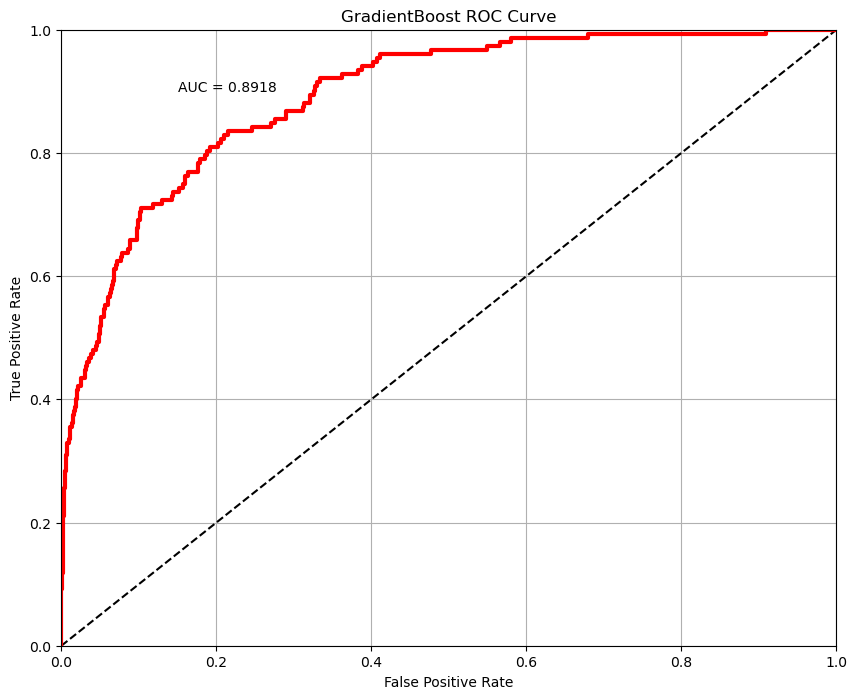

In [3]:
gbc=GradientBoostingClassifier(n_estimators=3000,learning_rate=0.005,min_samples_leaf=70,min_samples_split=1100,max_depth=12,max_features='sqrt',random_state=10)
gbc.fit(X_train, y_train)
y_valid_scores = gbc.predict_proba(X_valid)[:, 1]
fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
auc_valid = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, "r", linewidth=3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GradientBoost ROC Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.15, 0.9, "AUC = " + str (round (auc_valid, 4)))
plt.show

In [4]:
result = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=0, scoring = 'roc_auc')
print(result.importances_mean)

[ 1.90024106e-03  3.29998752e-04  3.11297071e-04  3.05369705e-04
  2.23784345e-04  1.37263717e-03  9.80085784e-04  3.05301393e-05
  8.07340896e-05  1.54217665e-03  3.53802802e-05  3.46078309e-04
  2.89363715e-04  2.01278220e-04  9.77348055e-04  2.10713136e-03
  2.97524353e-05  2.93157649e-04  1.75808412e-03  6.35773073e-05
  3.00272591e-04  2.42922170e-04  8.87948871e-05  2.18923694e-04
  3.83702371e-04  3.57376037e-05  2.95012579e-04  9.03350565e-04
  2.36516621e-05  9.91362493e-05  7.36706450e-04  1.98419632e-05
  1.52950218e-04  3.34297143e-04  2.56221961e-05  5.16831644e-04
  2.78876796e-03  6.81962389e-05  4.28341533e-04  1.39565300e-03
  9.51846719e-05  6.62582845e-04  1.13140703e-03  1.04023173e-04
  5.20583541e-04  3.06147409e-04  8.24523952e-05  6.04512523e-04
  5.25928154e-03  5.15071300e-05  2.43973122e-04  4.18273418e-04
  1.95214230e-05  1.29703172e-04  1.77291830e-03  2.39354190e-05
  6.93312665e-05  4.39802158e-04  2.64577025e-05  3.29767543e-04
  1.57060489e-03  1.22751

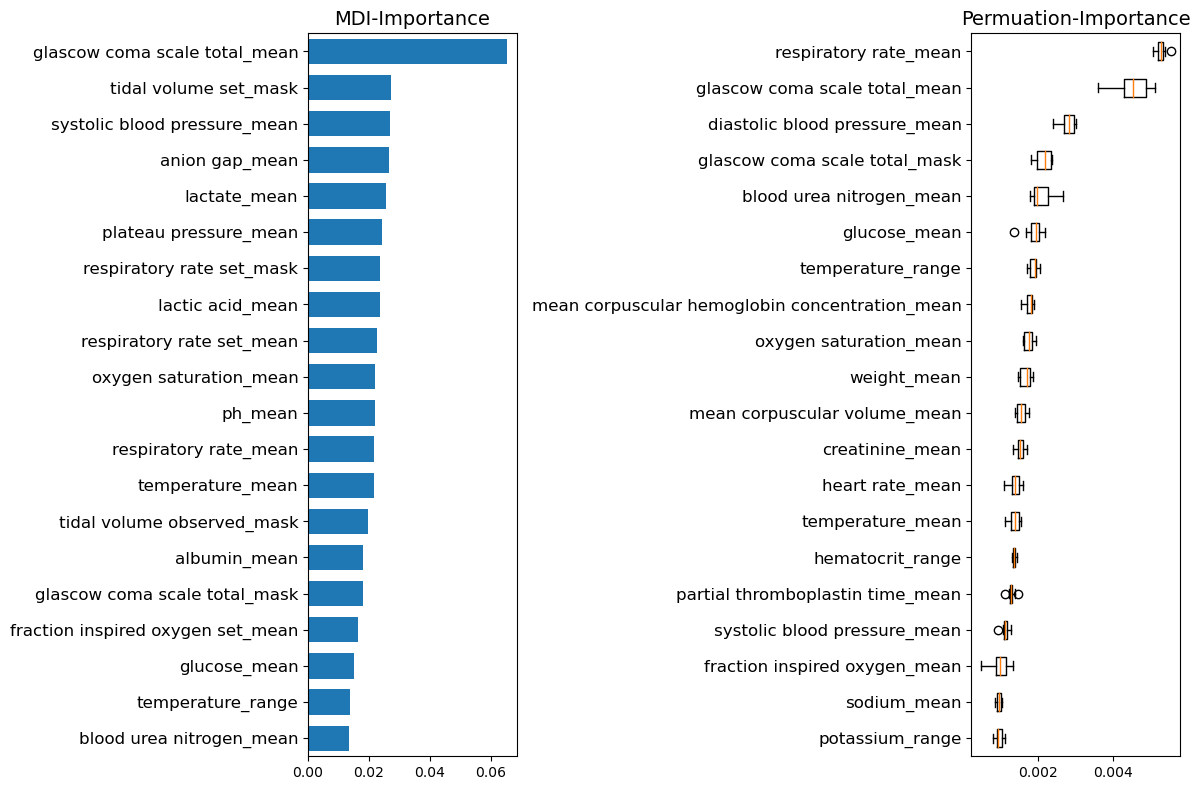

In [32]:
# result = permutation_importance(gbc, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(gbc.feature_importances_)
tree_indices = np.arange(0, len(gbc.feature_importances_)) + 0.5

perm_sorted_idx_new = perm_sorted_idx[-20:]
tree_importance_sorted_idx_new = tree_importance_sorted_idx[-20:]
tree_indices_new = np.arange(0, 20) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices_new, gbc.feature_importances_[tree_importance_sorted_idx_new], height=0.7)
ax1.set_yticks(tree_indices_new)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx_new], fontsize=12)
# ax1.set_ylim((0, len(gbc.feature_importances_)))
ax1.set_ylim((0, 20))
ax1.set_title('MDI-Importance', fontsize=14)

ax2.boxplot(
    result.importances[perm_sorted_idx_new].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx_new],
)
ax2.tick_params(axis='y',labelsize=12)
ax2.set_title('Permuation-Importance', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
index_ls = np.array([7, 9, 10, 11, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25,27, 28])